Found 3 images in ../data/rgb
Loaded 3 annotations from ../data/pairs.xml
[AnnoPair(W: frame_000022.jpg, T: frame_000022.jpg), AnnoPair(W: frame_000024.jpg, T: frame_000024.jpg), AnnoPair(W: frame_000025.jpg, T: frame_000025.jpg)]


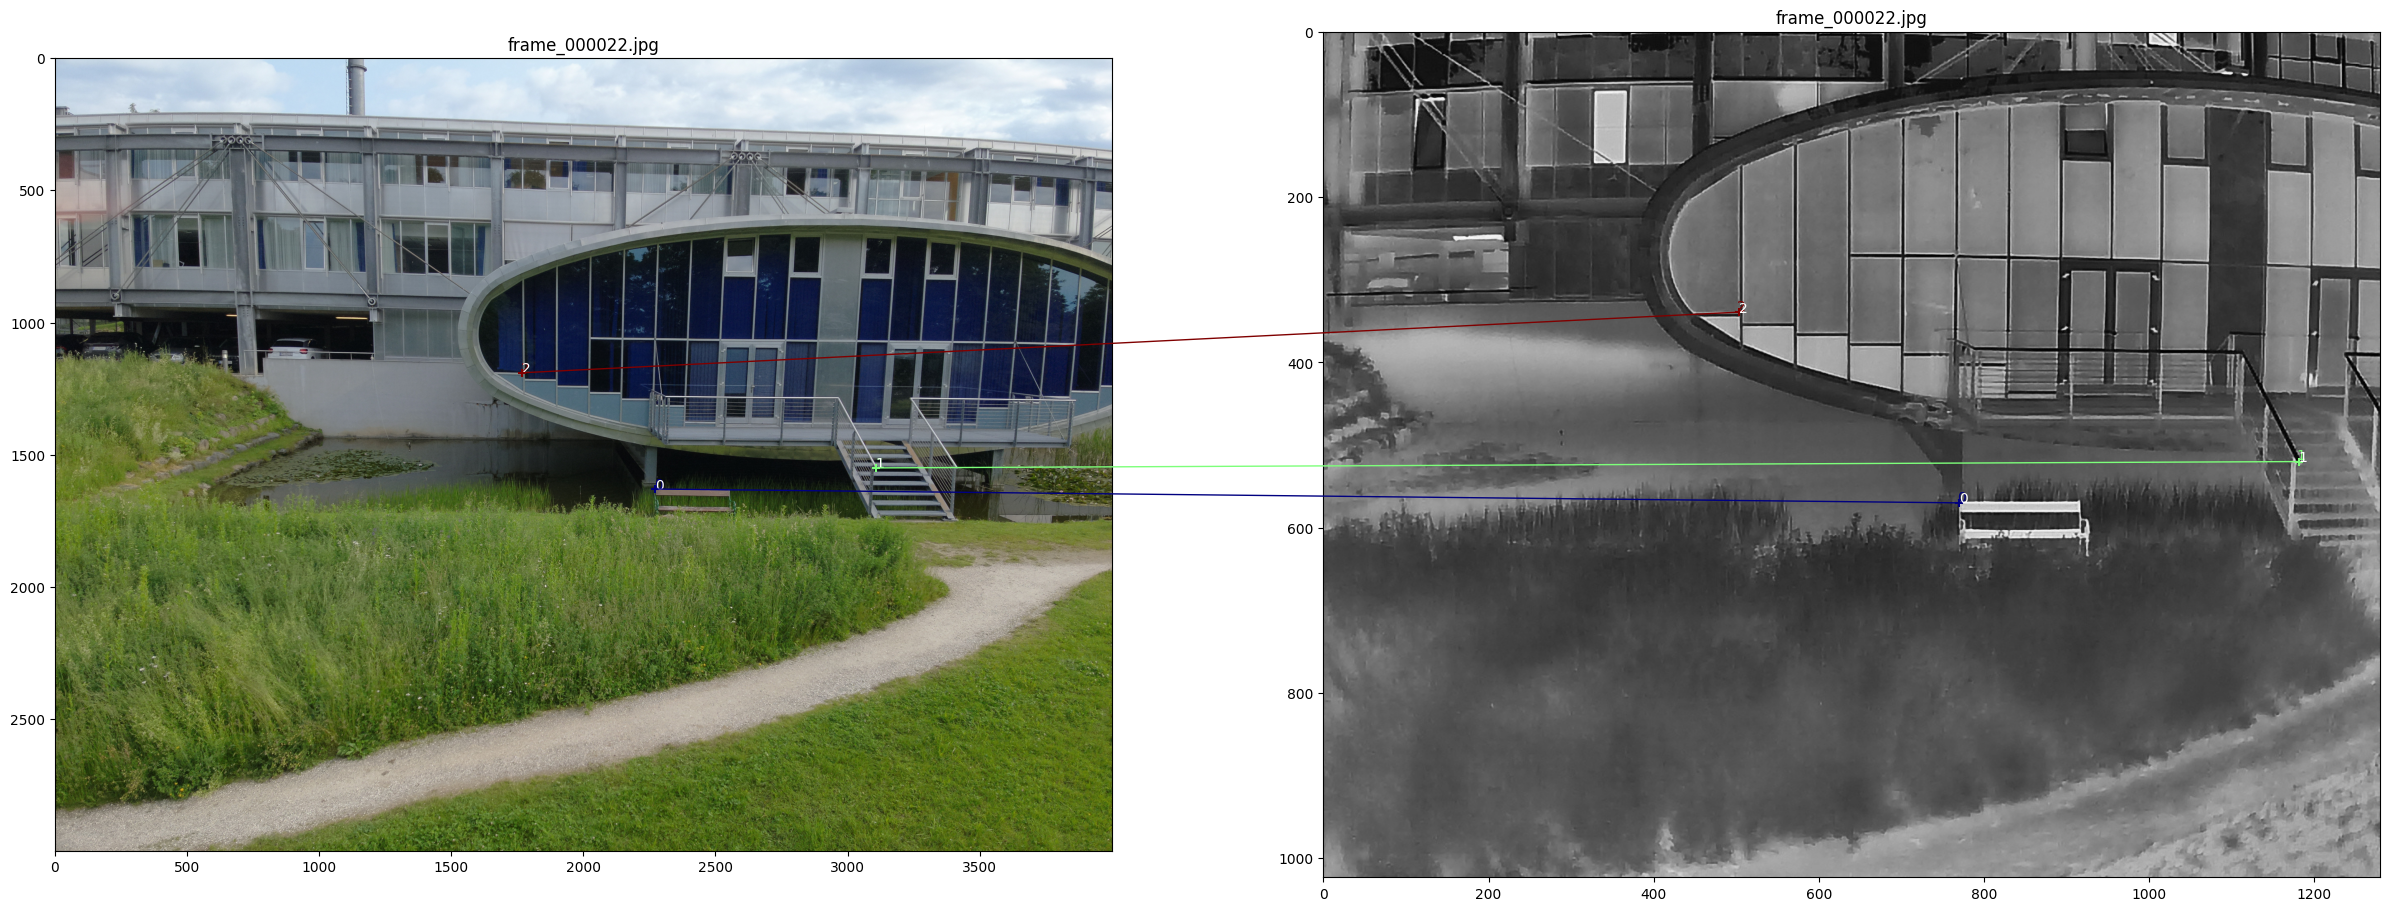

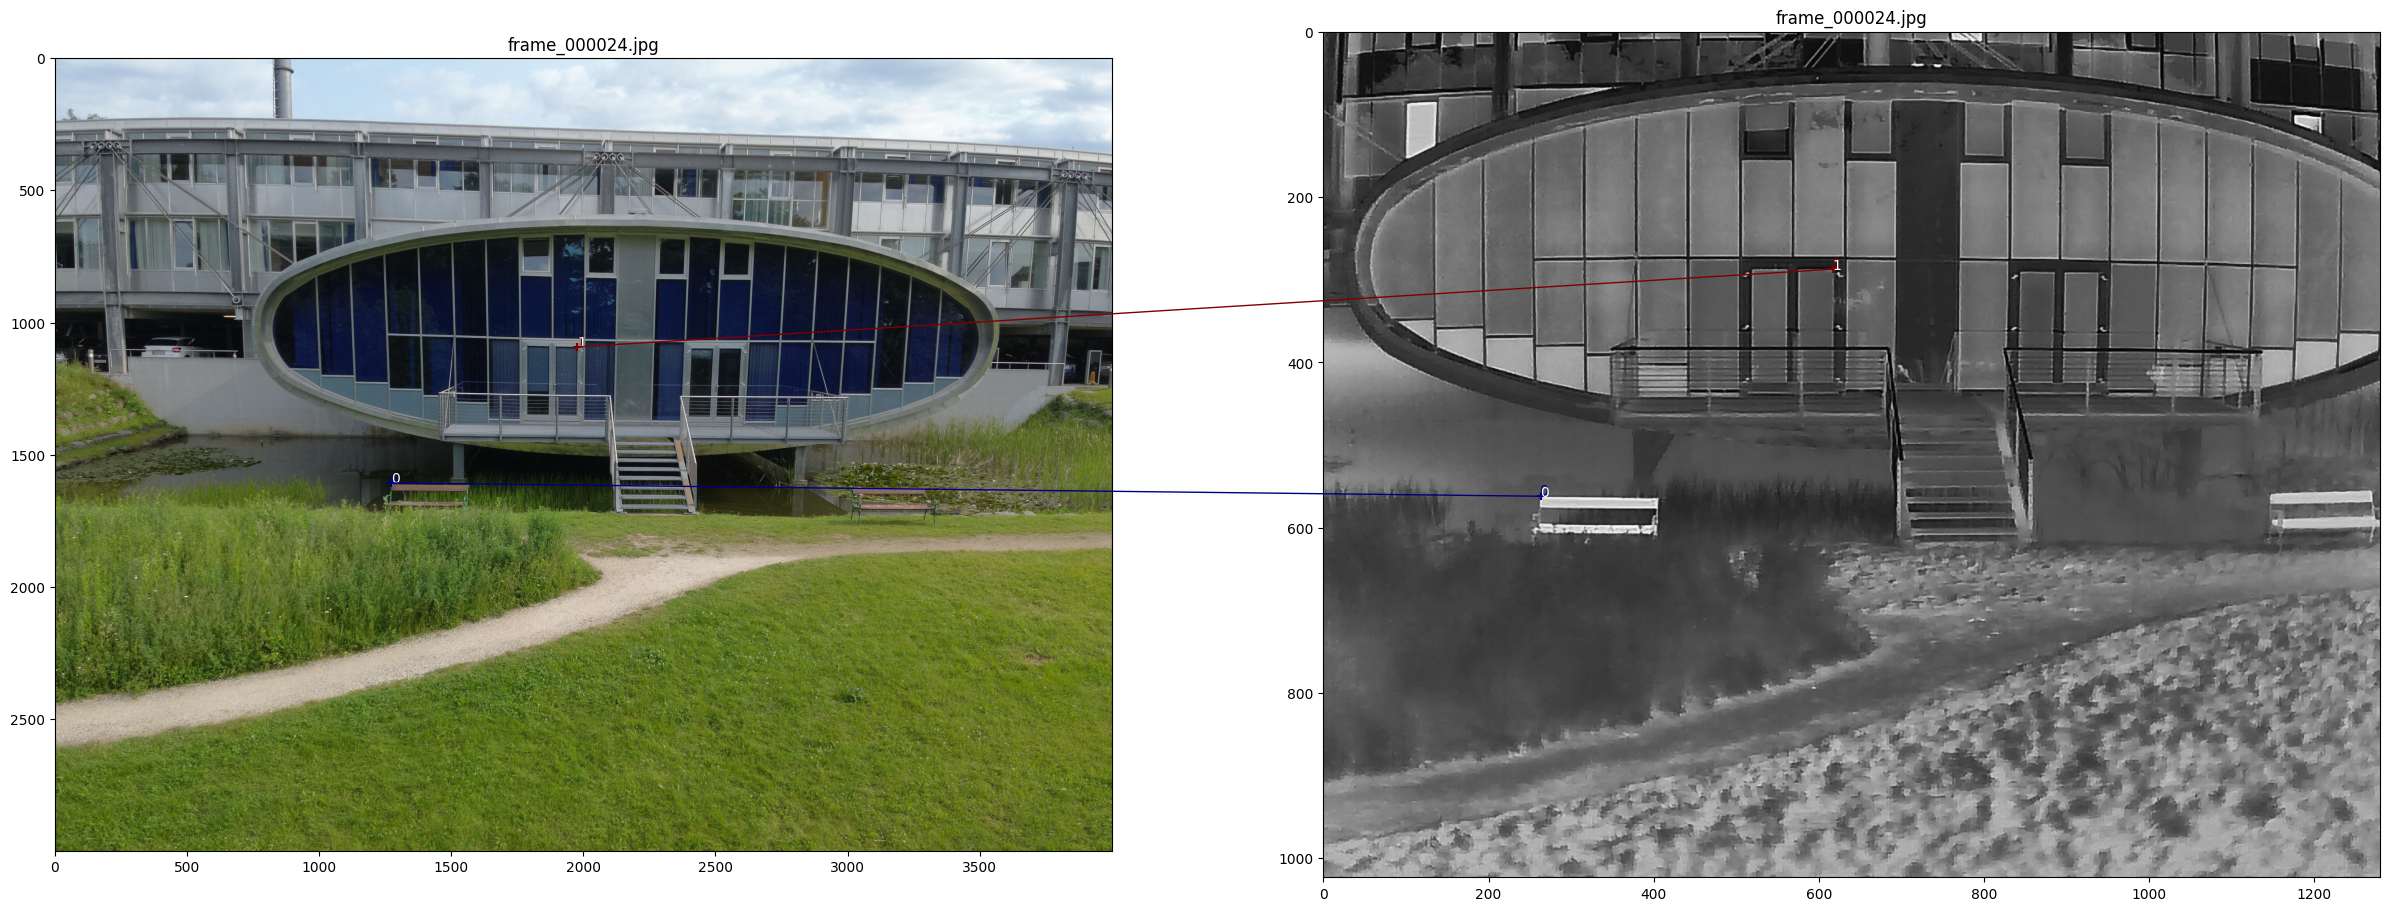

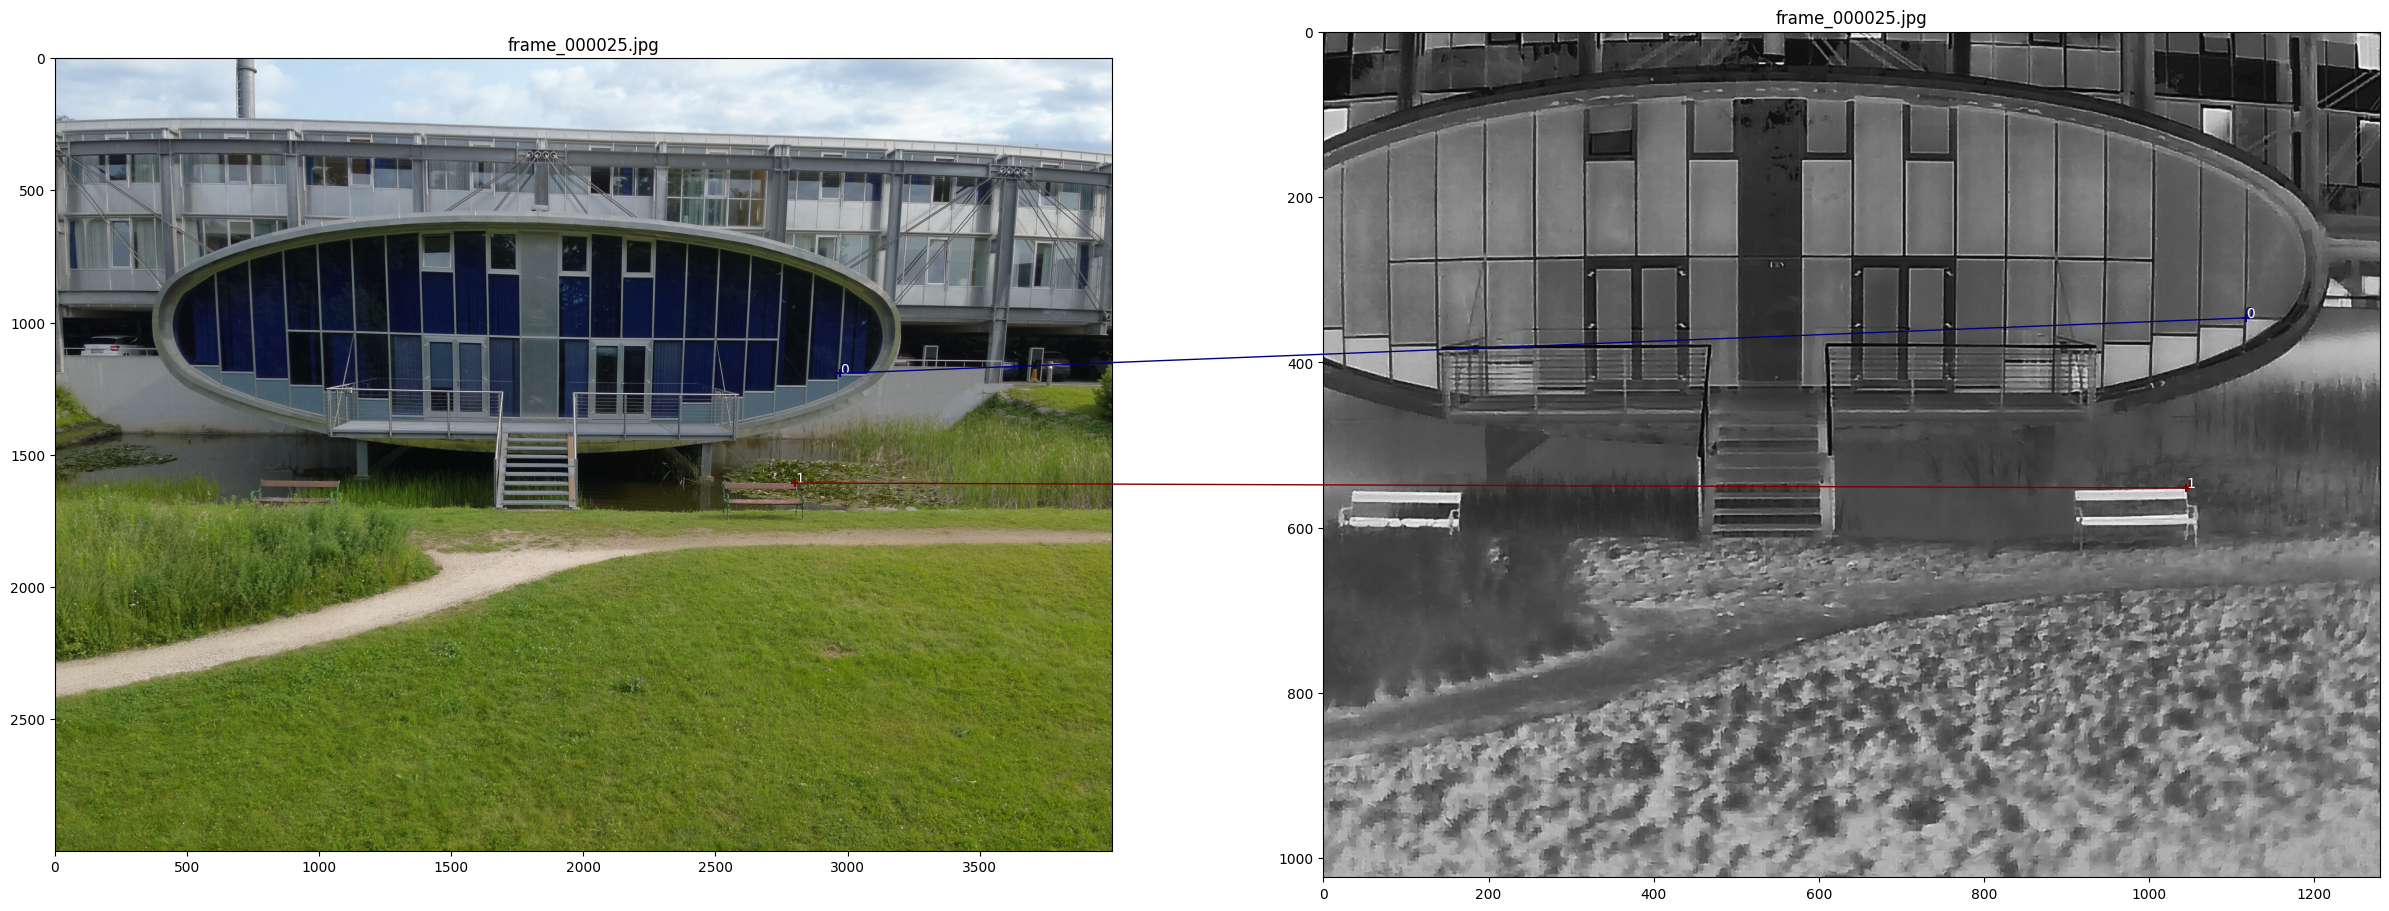

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from annotations import AnnoImage, AnnoPair, load_annotations, save_annotations, plot_pair, plot_annotations, create_annotation_pairs
from utils import read_images


display_resolutions = (1200,1200)
display_offset = (0,0)

#input paths
w_filepath = r"../data/rgb"
t_filepath = r"../data/thermal"
output_folder = r"../data/pairs"
anno_file = r"../data/pairs.xml"

# read images
images, w_files, t_files = read_images(w_filepath, t_filepath)
print(f"Found {len(w_files)} images in {w_filepath}")

# init or load annotations
try:
    pairs = load_annotations(anno_file, w_filepath, t_filepath)
    print(f"Loaded {len(pairs)} annotations from {anno_file}")
    # Note: delete anno file if you want to start fresh
except:
    print(f"No annotations found in {anno_file}, creating new annotations!")
    pairs = None

if pairs is None:
    pairs = create_annotation_pairs(w_filepath, t_filepath)
    save_annotations(pairs, anno_file)
    print(f"Created {len(pairs)} annotations and saved to {anno_file}")

# print annotations
print(pairs)

# show loaded or created annotations
for pair in pairs:
    plt.figure(figsize=(30,15))
    plot_pair(pair, draw_matches=True)
    plt.show()


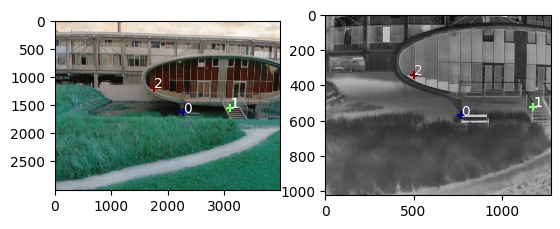

In [2]:
pair_iter = iter(pairs)
pair = next(pair_iter)


def onClick(event,x,y,flags,img):
    """Called whenever user left clicks"""
    global Running
    global W_or_T
    global key 
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f'click at {x},{y} in image {img.name}')
        img.addAnnotation(x,y)
        #Running = False
        W_or_T = not W_or_T

        # save annotations
        save_annotations(pairs, anno_file)

        


W_or_T = False
# Create window(s)
img = (pair["W"]) if W_or_T else (pair["T"])
img.windowname = "Image" #f"{'W' if W_or_T else 'T'} Image"
winname = img.windowname 

cv2.namedWindow(winname,cv2.WINDOW_FULLSCREEN|cv2.WINDOW_KEEPRATIO)
cv2.imshow(img.windowname, img.display_image)
#cv2.moveWindow(winname, display_offset[0], display_offset[1])
#cv2.resizeWindow(winname, img.image.shape[1], img.image.shape[0])
#cv2.redrawWindow(winname)
cv2.setMouseCallback(winname, onClick, param = (img))



key = ""
Running = True
while Running and key != 27:
    img = (pair["W"]) if W_or_T else (pair["T"])
    img.windowname =  "Image" # f"{'W' if W_or_T else 'T'} Image"
    cv2.imshow(img.windowname, img.display_image)
    cv2.setMouseCallback(img.windowname, onClick, param = (img))

    key = cv2.waitKey(1)
    if (key == " " or key == 32 or key == "n") and not W_or_T:
        # check if next pair exists
        try:
            pair = next(pair_iter)
        except StopIteration:
            Running = False
            continue
        key = ""
    #print(key)

cv2.destroyAllWindows()

# display annotations on original images
# display images
ax = plt.subplot(1, 2, 1), plt.imshow(pair["W"].original_image)
plot_annotations(pair["W"])
ax = plt.subplot(1, 2, 2), plt.imshow(pair["T"].original_image)
plot_annotations(pair["T"])
